## Demo vẽ bản đồ - đồ án môn cơ sở trí tuệ nhân tạo - ĐH KHTN TPHCM
Trợ giảng: 
- Nguyễn Khánh Toàn - ktoan271199@gmail.com
- Lê Minh Nhật - minhnhatvt2@gmail.com

## Các hàm bổ trợ

In [157]:
import os
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import dfs
import bfs
import gbfs
import astar
import gbfs_bonus
import astar_bonus
import heuristic as hx

In [158]:
def visualize_maze(matrix, bonus, start, end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']

    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            # elif route[i][1]-route[i-1][1]<0:
            else:
                direction.append('<')
            # else:
            #     direction.append(' ')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=100).add_subplot(111)
    
    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)
    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='blue')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
      print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')

In [159]:
def read_file(file_name: str = 'maze.txt'):
  f=open(file_name,'r')
  n_bonus_points = int(next(f)[:-1])
  bonus_points = []
  for i in range(n_bonus_points):
    x, y, reward = map(int, next(f)[:-1].split(' '))
    bonus_points.append((x, y, reward))

  text=f.read()
  matrix=[list(i) for i in text.splitlines()]
  f.close()

  return bonus_points, matrix

### Đọc file và vẽ bản đồ
- Để đổi map, thay tên của map bằng các số từ 1 đến 5:
- VD: `maze_map1.txt` , `maze_map2.txt`
- Với các map có điểm thưởng tên sẽ là `maze_map_bonus1.txt`, thay các số từ 1 tới 3 tương ứng với bản đồ có 2,5,10 điểm thưởng

In [160]:
# bonus_points, matrix = read_file('./map/maze_map5.txt')
bonus_points, matrix = read_file('./map/maze_map_bonus1.txt')

In [161]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 11
The width of the matrix: 22


In [162]:
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass

### Đặt cờ flag để thay đổi heuristic: ( từ 1 đến 4)

In [163]:
flag = 2

### I. Tìm kiếm không có thông tin

#### 1. Dùng Depth First Search (DFS) để tìm đường đi   

In [164]:
route1,travel1 = dfs.dfs(start,end,matrix)

Chi phi duong di:  34
So o da duyet:  57


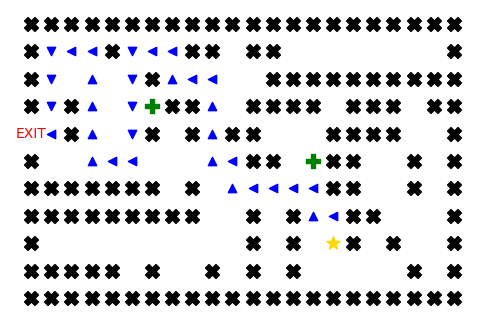

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -8
Bonus point at position (x, y) = (5, 14) with point -2
None


In [165]:
print('Chi phi duong di: ', len(route1))
print('So o da duyet: ',travel1)
print(visualize_maze(matrix,bonus_points,start,end,route1))


#### 2. Dùng Breadth First Search (BFS) để tìm đường đi

In [166]:
route2,travel2 = bfs.bfs(start,end,matrix)

Chi phi duong di:  20
So o da duyet:  79


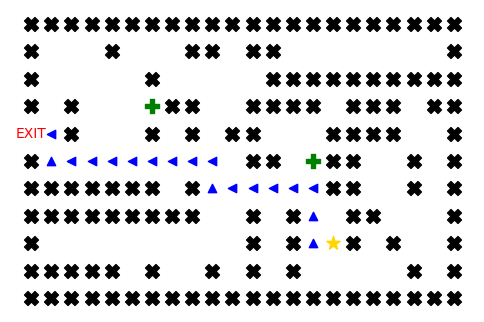

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -8
Bonus point at position (x, y) = (5, 14) with point -2
None


In [167]:
print('Chi phi duong di: ', len(route2))
print('So o da duyet: ',travel2)
print(visualize_maze(matrix,bonus_points,start,end,route2))

### II. Tìm kiếm có thông tin

#### 1. Tìm kiếm tham lam (Greedy Best First Search)

In [168]:
route3,travel3 = gbfs.gbfs(start,end,matrix,flag)

36

Chi phi duong di:  20
So o da duyet:  36


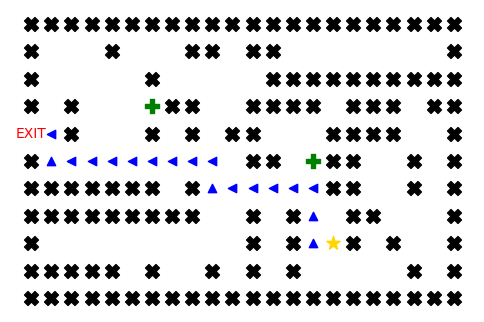

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -8
Bonus point at position (x, y) = (5, 14) with point -2
None


In [169]:
print('Chi phi duong di: ', len(route3))
print('So o da duyet: ',travel3)
print(visualize_maze(matrix,bonus_points,start,end,route3))

#### 2. Tìm kiếm A*

In [170]:
route4,travel4 = astar.astar(start,end,matrix,flag)

47

Chi phi duong di:  20
So o da duyet:  47


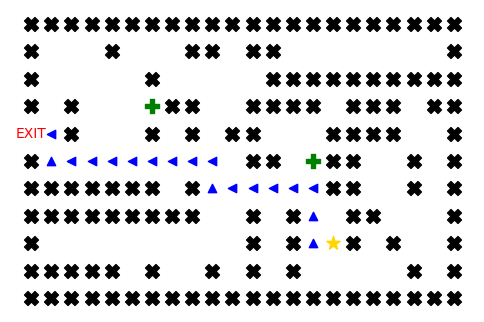

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -8
Bonus point at position (x, y) = (5, 14) with point -2
None


In [171]:
print('Chi phi duong di: ', len(route4))
print('So o da duyet: ',travel4)
print(visualize_maze(matrix,bonus_points,start,end,route4))

### III.Tìm kiếm có điểm thưởng:
- Trường hợp không có điểm thưởng thì chạy như thuật toán tìm kiếm bình thường

#### 1. Tìm kiếm điểm thưởng bằng thuật toán tham lam

In [172]:
temp = bonus_points.copy()
route5 = gbfs_bonus.gbfs_bonus(start,end,matrix,temp,flag)
distace5 = len(route5)
for i in range(len(bonus_points)):
    if (bonus_points[i][0],bonus_points[i][1]) in route5:
        distace5 += bonus_points[i][2]



chi phi duong di:  18


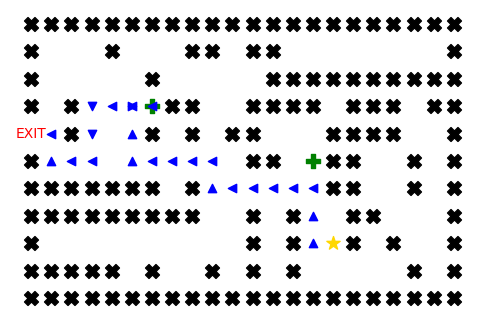

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -8
Bonus point at position (x, y) = (5, 14) with point -2
None
[(8, 15), (8, 14), (7, 14), (6, 14), (6, 13), (6, 12), (6, 11), (6, 10), (6, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (3, 5), (3, 4), (3, 3), (4, 3), (5, 3), (5, 2), (5, 1), (4, 1), (4, 0)]


In [173]:
print('chi phi duong di: ', distace5)
print(visualize_maze(matrix,bonus_points,start,end,route5))
print(route5)


#### 2. Tìm kiếm điểm thưởng bằng A*

In [174]:

temp = bonus_points.copy()
route6 = astar_bonus.astar_bonus(start,end,matrix,temp,flag)
distace6 = len(route6)
for i in range(len(bonus_points)):
    if (bonus_points[i][0],bonus_points[i][1]) in route6:
        distace6 += bonus_points[i][2]


chi phi duong di:  18


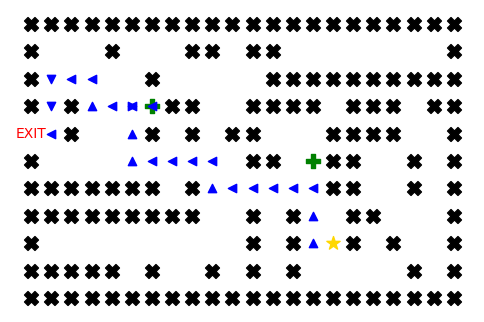

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -8
Bonus point at position (x, y) = (5, 14) with point -2
None
[(8, 15), (8, 14), (7, 14), (6, 14), (6, 13), (6, 12), (6, 11), (6, 10), (6, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (3, 5), (3, 4), (3, 3), (2, 3), (2, 2), (2, 1), (3, 1), (4, 1), (4, 0)]


In [175]:
print('chi phi duong di: ', distace6)
print(visualize_maze(matrix,bonus_points,start,end,route6))
print(route6)